<a href="https://colab.research.google.com/github/jadhavramdas/OBSIP/blob/main/cleaning_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/AB_NYC_2019[1].csv")

In [3]:
data=df.copy()
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632.0,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150.0,3.0,0.0,NaN,NaN,1.0,365.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29203 entries, 0 to 29202
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              29203 non-null  int64  
 1   name                            29187 non-null  object 
 2   host_id                         29202 non-null  float64
 3   host_name                       29184 non-null  object 
 4   neighbourhood_group             29202 non-null  object 
 5   neighbourhood                   29202 non-null  object 
 6   latitude                        29202 non-null  float64
 7   longitude                       29202 non-null  float64
 8   room_type                       29202 non-null  object 
 9   price                           29202 non-null  float64
 10  minimum_nights                  29202 non-null  float64
 11  number_of_reviews               29202 non-null  float64
 12  last_review                     

In [5]:
data.isnull().sum()

id                                   0
name                                16
host_id                              1
host_name                           19
neighbourhood_group                  1
neighbourhood                        1
latitude                             1
longitude                            1
room_type                            1
price                                1
minimum_nights                       1
number_of_reviews                    1
last_review                       4830
reviews_per_month                 4830
calculated_host_listings_count       1
availability_365                     1
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.dropna(subset=['name','host_name','last_review','reviews_per_month'],inplace=True)

In [8]:
data.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24352 entries, 0 to 29201
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              24352 non-null  int64  
 1   name                            24352 non-null  object 
 2   host_id                         24352 non-null  float64
 3   host_name                       24352 non-null  object 
 4   neighbourhood_group             24352 non-null  object 
 5   neighbourhood                   24352 non-null  object 
 6   latitude                        24352 non-null  float64
 7   longitude                       24352 non-null  float64
 8   room_type                       24352 non-null  object 
 9   price                           24352 non-null  float64
 10  minimum_nights                  24352 non-null  float64
 11  number_of_reviews               24352 non-null  float64
 12  last_review                     24352

In [10]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0


In [11]:
c=data['room_type'].value_counts()
c

room_type
Entire home/apt    13211
Private room       10755
Shared room          386
Name: count, dtype: int64

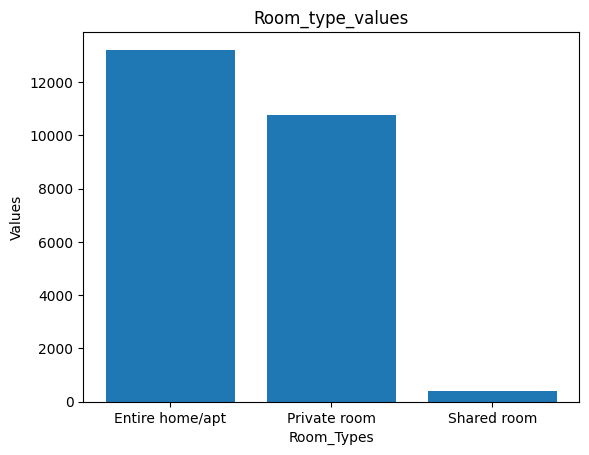

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.bar(c.index, c.values)
ax.set_xlabel('Room_Types')
ax.set_ylabel('Values')
ax.set_title('Room_type_values')
plt.show()

In [13]:
d=data['host_name'].value_counts().nlargest(10)
d

host_name
Michael    223
David      180
Alex       137
Sarah      137
John       128
Mike       120
Daniel     119
Chris      117
Jessica    116
Anna       105
Name: count, dtype: int64

<Figure size 1000x500 with 0 Axes>

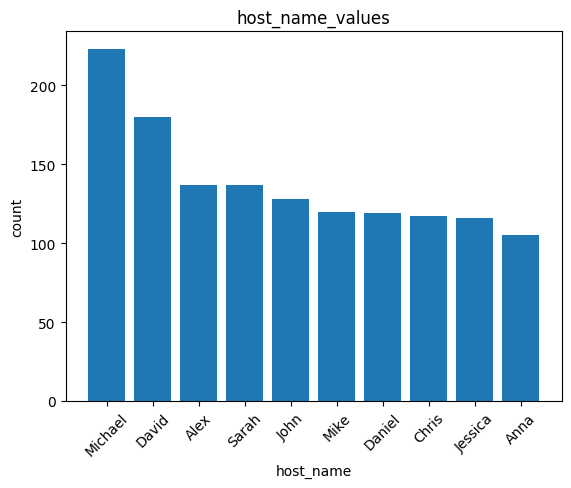

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
fig, ax = plt.subplots()
ax.bar(d.index, d.values)
ax.set_xlabel('host_name')
ax.set_ylabel('count')
ax.set_title('host_name_values')
plt.xticks(rotation=45)
plt.show()

In [15]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0


In [16]:
df = data[['host_name', 'room_type']]
df

,host_name,room_type
0,John,Private room
1,Jennifer,Entire home/apt
3,LisaRoxanne,Entire home/apt
4,Laura,Entire home/apt
5,Chris,Entire home/apt
...,...,...
29196,Zack,Private room
29197,Gareth,Entire home/apt
29199,Alejandro,Entire home/apt
29200,Zeleke,Entire home/apt


In [17]:
data.groupby('host_name')['room_type'].sum()

host_name
'Cil                                                             Private room
(Ari) HENRY LEE                                               Entire home/apt
(Email hidden by Airbnb)    Private roomEntire home/aptEntire home/aptPriv...
(Mary) Haiy                                                   Entire home/apt
@ Art House Monique                   Private roomPrivate roomEntire home/apt
                                                  ...                        
常春                                         Shared roomShared roomPrivate room
柏润                                                               Private room
正川                                                   Private roomPrivate room
筱                                                                Private room
诗月                                                               Private room
Name: room_type, Length: 7049, dtype: object

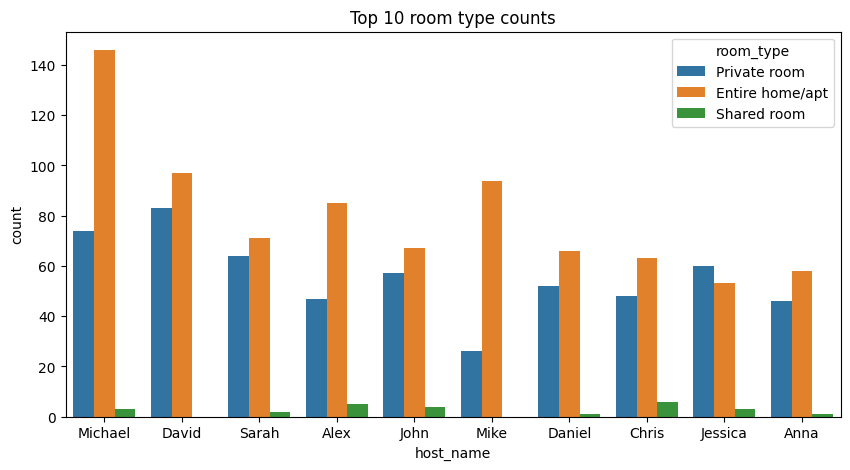

In [18]:
host_name=data['host_name'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=[10,5])
sns.countplot(data=df,
             x='host_name',
             order=host_name.index,
             hue='room_type');
plt.title('Top 10 room type counts');

In [19]:
data.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787.0,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149.0,1.0,9.0,2018-10-19,0.21,6.0,365.0
1,2595,Skylit Midtown Castle,2845.0,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225.0,1.0,45.0,2019-05-21,0.38,2.0,355.0
3,3831,Cozy Entire Floor of Brownstone,4869.0,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89.0,1.0,270.0,2019-07-05,4.64,1.0,194.0


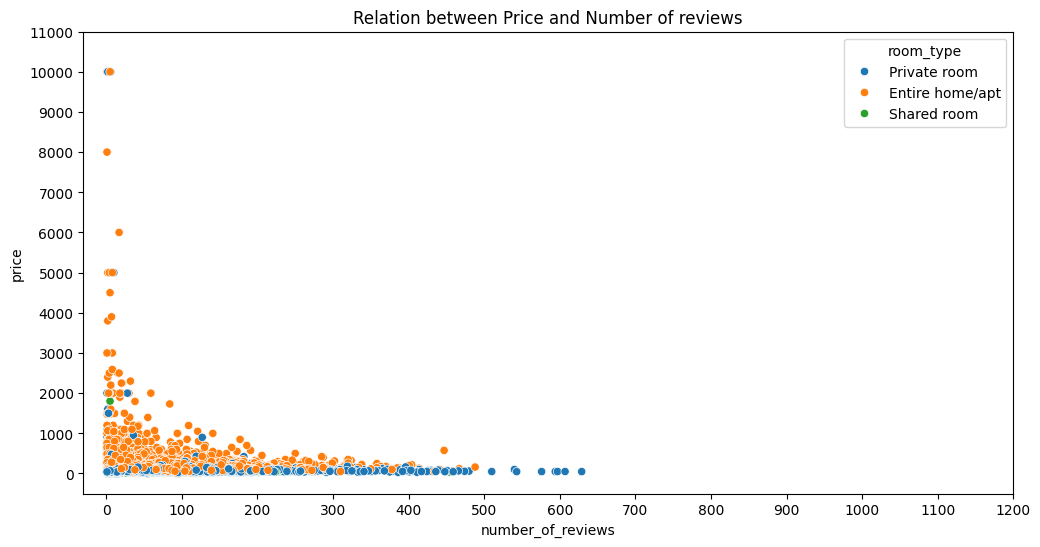

In [20]:
plt.figure(figsize=[12,6])
sns.scatterplot(y=data['price'],
               x=data['number_of_reviews'],
               hue=data['room_type']
               )
plt.title('Relation between Price and Number of reviews')

plt.xticks(range(0,1300,100))
plt.yticks(range(0,12000,1000))
plt.show()

In [21]:
availability=data.groupby('neighbourhood_group')['availability_365'].mean()
availability

neighbourhood_group
Bronx            174.956621
Brooklyn         102.716435
Manhattan        101.921637
Queens           151.120363
Staten Island    225.587097
Name: availability_365, dtype: float64